In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv" , encoding="ISO-8859-1")
df
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df= df.rename(columns={'v1':'spam','v2':'text'})
df

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


** **find out the percentage of ham and spam***

In [4]:
ham = df[df['spam']== 'ham']
ham
print ('ham percentage =', (len(ham))/len(df)*100,'%')

ham percentage = 86.59368269921033 %


In [5]:
spam = df[df['spam']== 'spam']
print ('spam percentage =', (len(spam))/len(df)*100,'%')

spam percentage = 13.406317300789663 %


**ploting both spam and ham**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='spam', ylabel='count'>

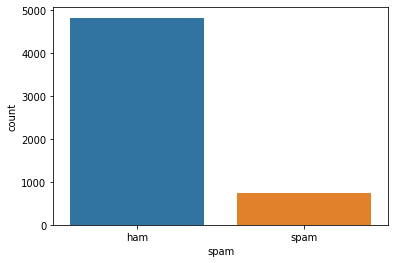

In [6]:
sns.countplot(df['spam'])


******converting Text  it into Array***`*

In [7]:
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
a= CountVectorizer()
d = a.fit_transform(df['text'])
print(d.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


***Check and test , whether it can detect given  sentences are ham or spam*******

In [8]:
label = df['spam'].values

from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB()
NB.fit(d, label)
test= [' Free entry in cinema  ', 'even my brother speak to Him']
testing = a.transform(test)
ham_or_spam =NB.predict(testing )
ham_or_spam

array(['spam', 'ham'], dtype='<U4')

*** split the dataset into training and testing and sort out the model prediction  then plot its confusion matrix ***

<AxesSubplot:>

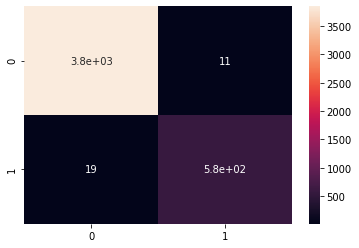

In [9]:
X = d
y = label 
y.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2)
from sklearn.naive_bayes import MultinomialNB 
e = MultinomialNB()
e.fit( X_train, y_train)
from sklearn.metrics import classification_report , confusion_matrix
predict= e.predict (X_train)
cm = confusion_matrix(y_train, predict)
sns.heatmap(cm, annot= True )

**now check model performance for testing part **

array([[953,  13],
       [  8, 141]])

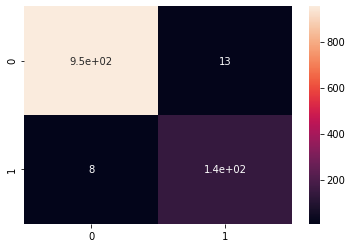

In [10]:
test_predict= e.predict (X_test)
cm = confusion_matrix(y_test, test_predict)
sns.heatmap(cm, annot= True )
cm

**classification Report ****

In [11]:
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.92      0.95      0.93       149

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115

